**1.** En estos ejercicios vamos a trabajar con la **FFT** y la **convolución**. Comenzaremos creando dos funciones: una que realice el cálculo de la FFT, devolviendo el valor absoluto del espectro, y otra que cargue un archivo *wav* a partir de la indicación de su nombre.

*Nota*: La FFT deberá ser de 10000 puntos.

In [36]:
from scipy.fftpack import fft, ifft, fftshift
import scipy.io.wavfile as spwav
import numpy as np
import time

# funcion que calcula la FFT y la IFFT
def calculo_fft(audio_data):
    espectro_audio = fft(audio_data, 10000)
    espectro_audio_norm = np.abs(espectro_audio)
    n = audiodata_fft.size
    return espectro_audio_norm, n

def cargar_wav(archivo):
    audiodata = spwav.read(archivo)
    return audiodata

**2.** Ahora generaremos la función que devuelve el gráfico de la FFT. El mismo deberá tener:

* Sus argumentos de entrada son un array *frecuencia*, que se usará para crear los valores del eje de abscisas, y el array con el espectro obtenido de la función `calculo_fft`. 
* Se deben normalizar los valores de amplitud del espectro.
* Se debe guardar una variable *n* con la longitud de la FFT
* Utilizaremos `plt.subplots()` para crear un objeto `axis` sobre el que modificaremos las propiedades del gráfico.
* El gráfico tendrá escala logarítmica para el eje x, mientras que el eje Y muestra valores logarítmicos en escala lineal (debemos aplicar $20log(X)$ siendo $X$ el vector con el espectro a graficar.
* Se debe etiquetar los ejes X e Y.
* Se debe agregar una grilla al gráfico.
* A esta altura tenemos el gráfico y sus elementos preparados, pero podemos agregar algunos detalles para mejorar la visualización:
    - La función `set_xticks` permite adaptar las etiquetas de los valores del eje de abscisas. La aprovecharemos para indicarle que nos muestre los valores de frecuencias centrales normalizadas entre 63 y 8000 Hz. Éstos se pasan como argumento en forma de lista: [63, 125, ..., 8000].
    - Para que la modificación anterior tenga efecto, se debe ingresar la siguiente línea: `ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())`, siendo `ax1` el nombre del objeto `axis` que hemos creado.
* Por último, con `set_xlim` y `set_ylim` podemos ajustar los límites para visualizar la función. Definamos los límites para *x* entre 31 Hz y 20000 Hz, y para *y* entre -80 dB y 0 dB.     

In [55]:
import matplotlib
import matplotlib.pyplot as plt

def graficar_fft(frecuencia, audiodata_fft):
    # valores previos para obtener el gráfico
    max_energetico = np.max(audiodata_fft)
    n = audiodata_fft.size
    #grafico
    fig, ax1 = plt.subplots()
    ax1.semilogx(frecuencia, (20*np.log10(audiodata_fft[:n//2]/max_energetico)))
    ax1.set_xticks([63, 125, 250, 500, 1000, 2000, 4000, 8000])
    ax1.set_xlabel('Frecuencia [Hz]')
    ax1.set_ylabel('Magnitud [dB]')
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax1.grid(which='both')
    ax1.set_xlim(31,20000)
    ax1.set_ylim(-80,0)
    fig.savefig('rta_frecuencia.png')

**3.** Por último, apliquemos nuestras funciones. Primero generaremos una variable con el nombre del archivo de audio *melodía_silbido.wav*. Mediante la función `cargar_wav` convertiremos este archivo en un array y lo pasaremos por la función `calculo_fft`. Hecho esto, debemos generar un vector *frecuencias* antes de hacer los gráficos (recordar que la FFT se crea tanto para frecuencias positivas como negativas). Finalmente, llamamos a la función `graficar_fft` y creamos el gráfico.

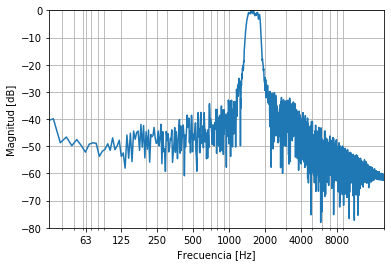

In [56]:
archivo = 'melodia_silbido.wav'

fs, audio_signal = cargar_wav(archivo)
audiodata_fft, n = calculo_fft(audio_signal)
frecuencias = np.linspace(0, fs // 2, n // 2)
graficar_fft(frecuencias, audiodata_fft)